In [5]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
data=pd.read_csv('D:/DATA SCIENCE/ASSIGNMENT/QUESTION/DECISION TREE/Fraud_check.csv')

In [7]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
col=["Undergrad","Marital.Status","Urban"]
label=preprocessing.LabelEncoder()

In [9]:
for i in col:
    data[i]=label.fit_transform(data[i])

In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


C:\Users\Anith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


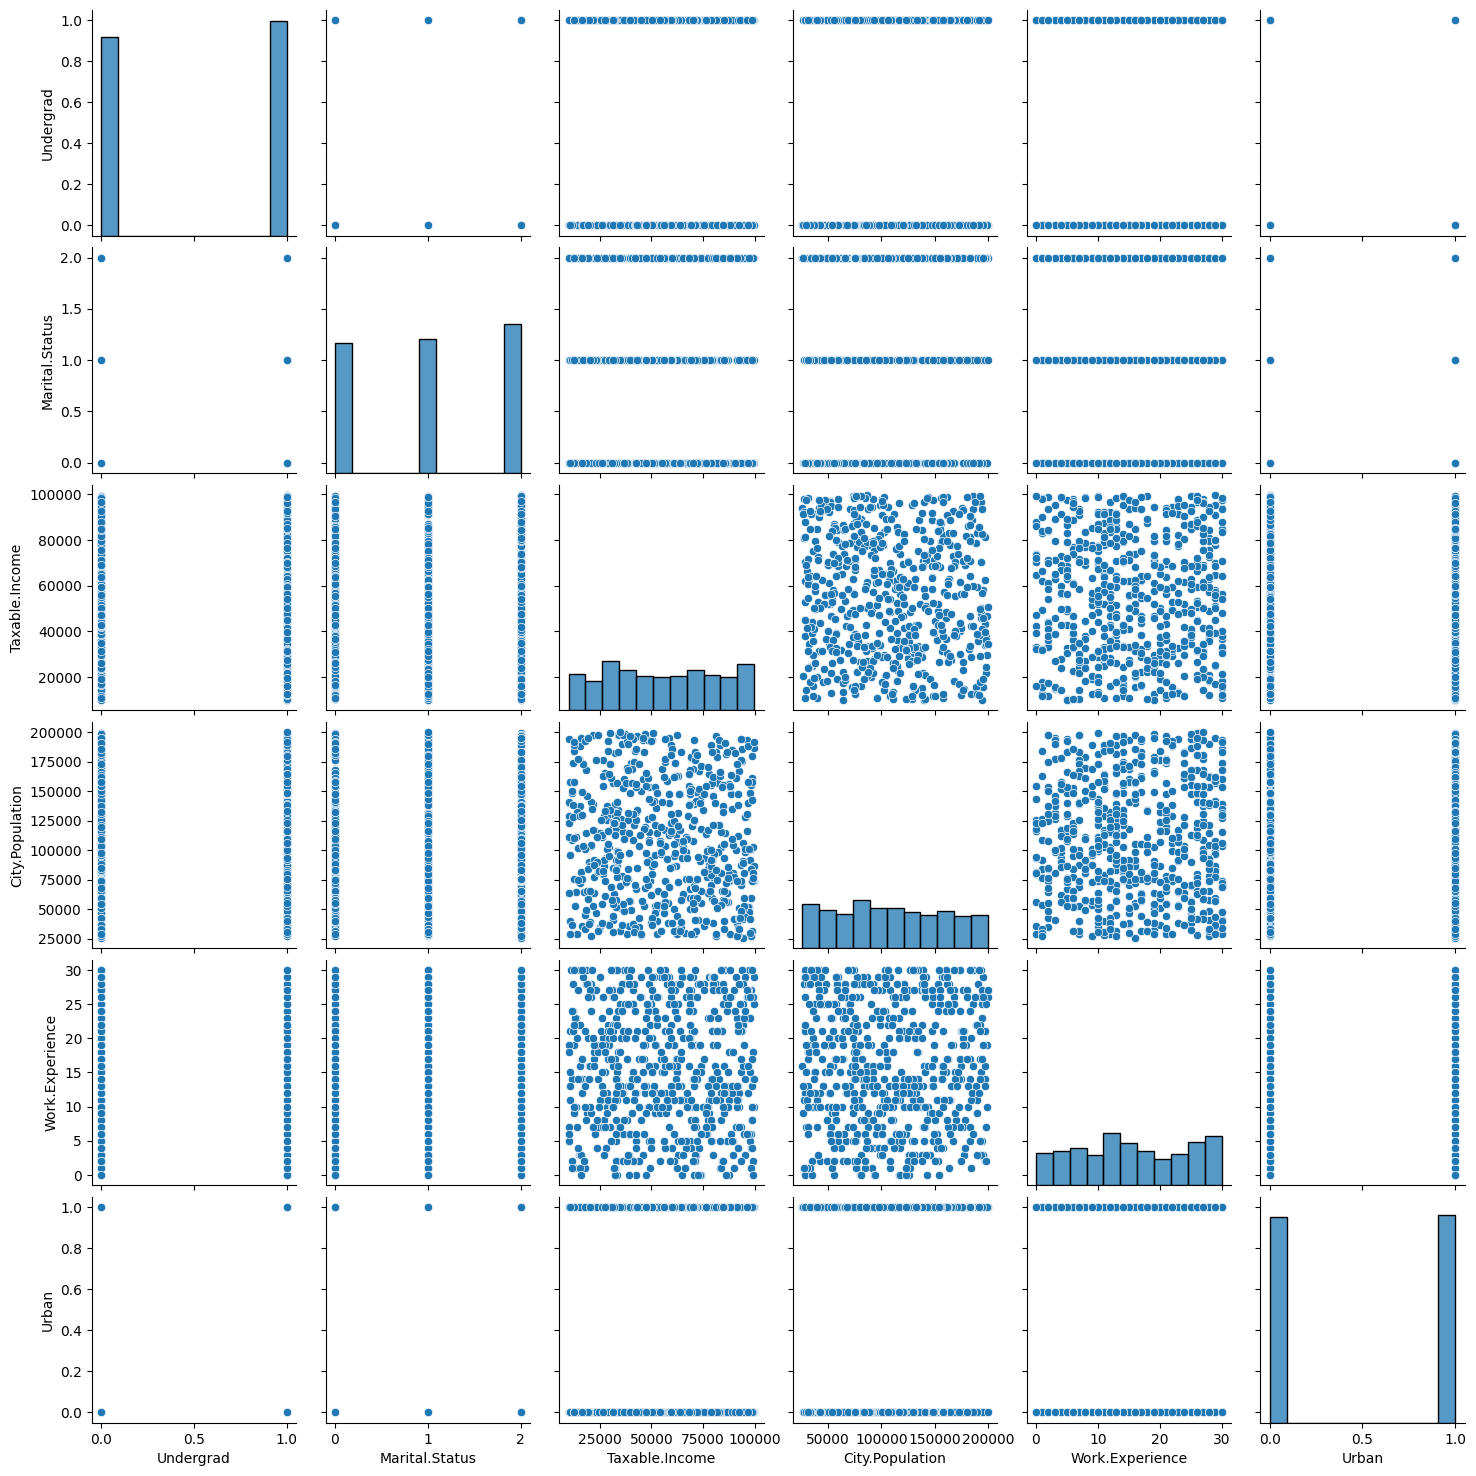

In [11]:
sns.pairplot(data)

<Axes: >

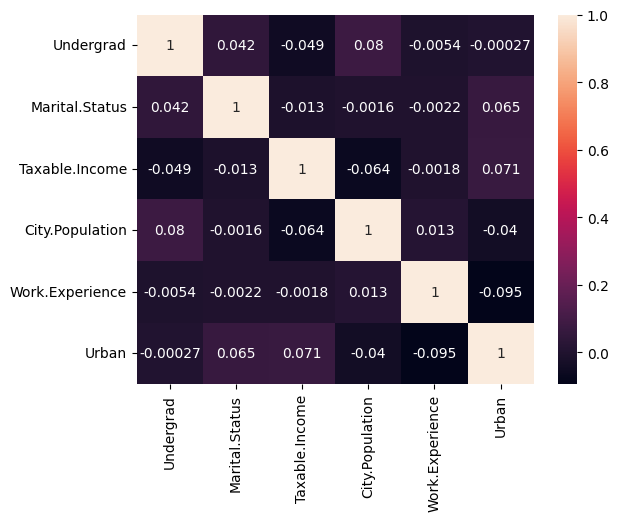

In [12]:
sns.heatmap(data.corr(),annot=True)

In [13]:
t_v=30000

In [14]:
data['tar']=data["Taxable.Income"]>=t_v

In [15]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tar
0,0,2,68833,50047,10,1,True
1,1,0,33700,134075,18,1,True
2,0,1,36925,160205,30,1,True
3,1,2,50190,193264,15,1,True
4,0,1,81002,27533,28,0,True
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,True
596,1,0,69967,55369,2,1,True
597,0,0,47334,154058,0,1,True
598,1,1,98592,180083,17,0,True


In [16]:
y=data['tar']

In [17]:
data1=data.drop(columns=['City.Population','tar'])

In [18]:
data1

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0
...,...,...,...,...,...
595,1,0,76340,7,1
596,1,0,69967,2,1
597,0,0,47334,0,1
598,1,1,98592,17,0


In [19]:
x=data1.iloc[:,0:5]

In [20]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.7,random_state=10)

In [21]:
x_train

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
221,1,2,43051,14,0
133,0,2,33492,14,1
141,1,1,56647,23,1
531,1,1,70743,14,1
258,0,0,92997,28,1
...,...,...,...,...,...
369,0,1,94413,28,0
320,1,2,78922,11,1
527,0,1,59243,27,0
125,1,0,87326,11,0


In [22]:
y_test

69      True
27      True
488     True
540    False
285     True
       ...  
46      True
466     True
162     True
298     True
532     True
Name: tar, Length: 420, dtype: bool

In [23]:
model=RandomForestClassifier(n_estimators=300,max_features=2,max_depth=5,criterion='gini')

In [24]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=2, n_estimators=300)

In [25]:
pred=model.predict(x_test)
#metrics.mean_absolute_percentage_error(pred,y_test)

In [26]:
model.score(x_test,y_test)

0.9976190476190476

In [27]:
model.score(x_train,y_train)

1.0

In [28]:
model.feature_importances_

array([0.00786659, 0.01572106, 0.91448215, 0.05344973, 0.00848047])